In [1]:
# Required Installs : numpy nltk pandas tensorflow numpy pydot
# pip install numpy nltk pandas tensorflow numpy pydot

In [34]:
# Imports 
import os
import numpy as np
import json
import pickle
import random
import nltk
import tensorflow as tf
import matplotlib.pyplot as plt

import fileinput
import re
nltk.download('punkt')
nltk.download('wordnet')

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input, Dropout, LSTM, Activation, Bidirectional,Embedding
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.models import load_model

from nltk.stem import WordNetLemmatizer
from nltk.tokenize import sent_tokenize



import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix

[nltk_data] Downloading package punkt to /home/anirudh/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /home/anirudh/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [51]:
def read_text_file(file_path,arryText):
    with open(file_path, 'r') as f:
        text = f.read()
        text = re.sub(r"(\n)\1{2,}", "", text).strip()
        arryText.append(text)
def toArray(arr1,arr2):
    temp = []
    for i in len(arr1):
        temp.append(arr1[i],arr2[i][:])
    return temp

In [70]:
os.chdir('/home/anirudh/Documents/CSCE 585/ML_chatbot_csce585')
data_file = open('data/intentData/data_small.json').read()
#smallData = json.loads(data_file)

filenames = []
textData = []
directories = [
    "data/EmoData/train"]
for dir in directories:
  for f in os.listdir(dir):
    filenames.append(f)
    temp = []
    for f1 in os.listdir(os.path.join(dir, f)):
        file_path = f"{dir}/{f}/{f1}"
        read_text_file(file_path,temp)
    textData.append(temp)
trainData = np.concatenate((filenames, textData))
print(trainData[0])
#smallDataDocument =np.array(tf.random.shuffle((smallData['train'])))
#testDataDocument = np.array(tf.random.shuffle(smallData['test']))


Anger


In [4]:
# Removes all duplicated words
intentTypeVector = CountVectorizer(analyzer = "word", tokenizer = None,lowercase=True, preprocessor = None, stop_words = None)
intentVectorData = intentTypeVector.fit_transform(smallDataDocument[:,1])

textVector = CountVectorizer(analyzer = "word", tokenizer = None,lowercase=True, preprocessor = None, stop_words = None)
textVectorData= textVector.fit_transform(smallDataDocument[:,0])

testDataDocument = np.array(tf.random.shuffle(smallData['test']))
testTextX=textVector.transform(testDataDocument[:,0]).toarray()
testTextY=intentTypeVector.transform(testDataDocument[:,1]).toarray()

trainDataX = textVectorData.toarray()
trainDataY = intentVectorData.toarray()


# cv_dataframe=pd.DataFrame(Count_data.toarray(),columns=CountVec.get_feature_names())
# print(cv_dataframe)
    

In [5]:


# High Learning Rate 
model = Sequential()
model.add(Dense(400, input_shape=(len(trainDataX[0]),), activation='tanh'))
model.add(Dropout(0.7))
model.add(Dense(200, activation='tanh'))
model.add(Dense(len(trainDataY[0]), activation='softmax',name='layer2'))
sgd = SGD(learning_rate=0.1, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
model.summary()
history = model.fit(np.array(trainDataX), np.array(trainDataY), shuffle=True,epochs=50, batch_size=128, verbose=1, validation_data=(testTextX,testTextY))
model.save('model/Intent_model_lr_high.h5', history)





Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 400)               1463600   
_________________________________________________________________
dropout (Dropout)            (None, 400)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 200)               80200     
_________________________________________________________________
layer2 (Dense)               (None, 150)               30150     
Total params: 1,573,950
Trainable params: 1,573,950
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
59/59 [==============================] - 2s 21ms/step - loss: 4.4600 - accuracy: 0.1747 - val_loss: 3.4427 - val_accuracy: 0.3709
Epoch 2/50
59/59 [==============================] - 1s 18ms/step - loss: 2.4606 - accuracy: 0.5239 - va

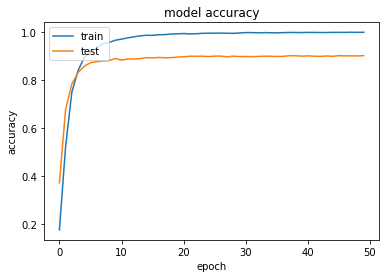

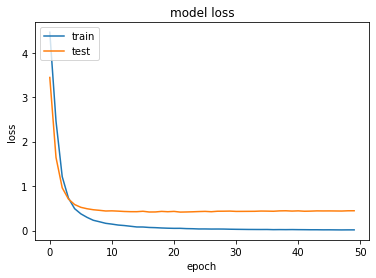

In [6]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

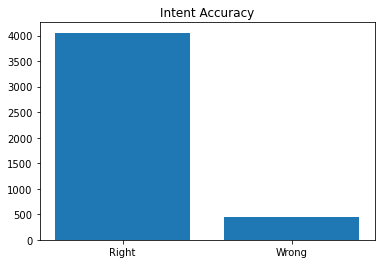

You:

 hello



ChatBot: greeting
You:

 how are you doing?



ChatBot: greeting
You:

 when does my class start



ChatBot: flight_status
You:

 where is usc



ChatBot: w2
You:

 who am i?



ChatBot: who_do_you_work_for
You:

 when are my taxes due



ChatBot: bill_due
You:

 where is the nearest restaurant



ChatBot: restaurant_suggestion
You:

 what is the healthiest food



ChatBot: calculator
You:

 what is sin(45)



ChatBot: calculator
You:

 78*36



ChatBot: yes
You:

 what is six times five



ChatBot: calculator
You:

In [ ]:
model = load_model('model/Intent_model_lr_high.h5')

right = 0
wrong = 0
testDataDocument = np.array((smallData['test']))
testTextX=textVector.transform(testDataDocument[:,0]).toarray()
testTextY=intentTypeVector.transform(testDataDocument[:,1]).toarray()

prediction = model.predict(testTextX)
Labels = intentTypeVector.get_feature_names()

for i in range(len(testDataDocument)):
    pred = prediction[i].argmax()

    if Labels[pred] == testDataDocument[i,1]:
        right +=1
    else:
        wrong +=1

plt.bar(['Right','Wrong'], [right,wrong])
plt.title('Intent Accuracy')
plt.show()
while True:
    print("You:",end='')
    text = input()
    testTextX=textVector.transform([text]).toarray()
    prediction = model.predict(testTextX)
    print("\nChatBot:",Labels[prediction[0].argmax()])

